In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'Fraud Detection Dataset.csv')

In [8]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [12]:
df.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [14]:
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [16]:
df.duplicated().sum()

881

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [98]:
df['Fraudulent'].value_counts()

Fraudulent
0    47652
1     2467
Name: count, dtype: int64

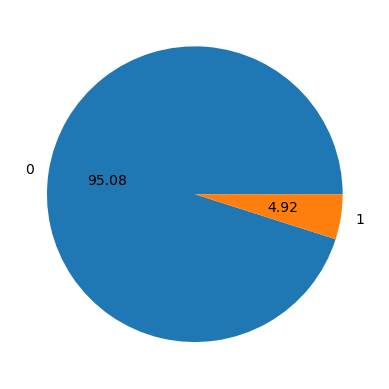

In [100]:
plt.pie(df['Fraudulent'].value_counts(),labels=['0','1'],autopct="%0.2f")
plt.show()  

In [22]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

Transaction_ID                      0.000000
User_ID                             0.000000
Transaction_Amount                  4.940242
Transaction_Type                    0.000000
Time_of_Transaction                 4.998105
Device_Used                         4.862427
Location                            4.988128
Previous_Fraudulent_Transactions    0.000000
Account_Age                         0.000000
Number_of_Transactions_Last_24H     0.000000
Payment_Method                      4.844470
Fraudulent                          0.000000
dtype: float64


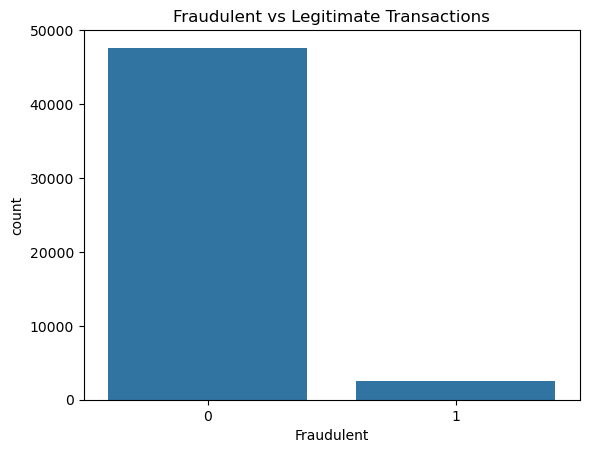

In [24]:
sns.countplot(x='Fraudulent', data=df)
plt.title('Fraudulent vs Legitimate Transactions')
plt.show()

In [26]:
df.shape

(50119, 12)

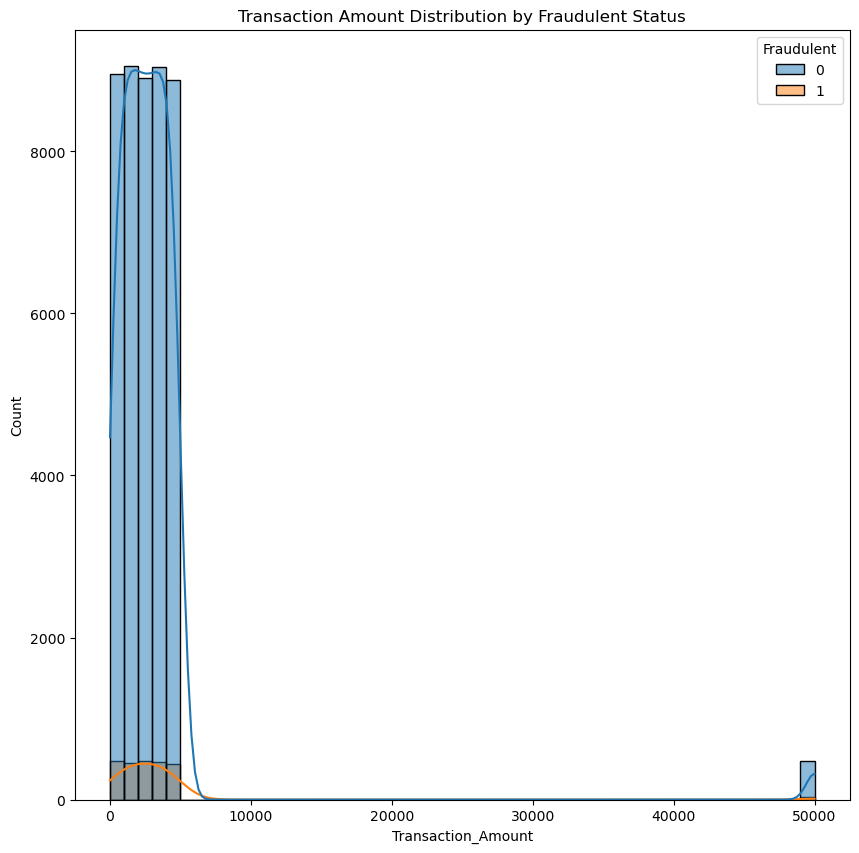

In [28]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='Transaction_Amount', hue='Fraudulent', bins=50, kde=True)
plt.title('Transaction Amount Distribution by Fraudulent Status')
plt.show()

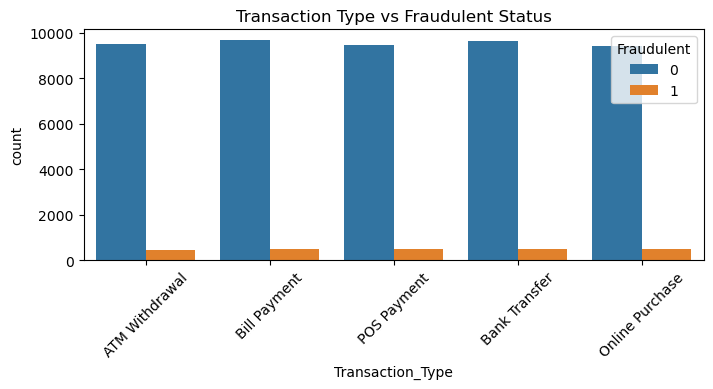

In [30]:
plt.figure(figsize=(8, 3))
sns.countplot(x='Transaction_Type', hue='Fraudulent', data=df)
plt.title('Transaction Type vs Fraudulent Status')
plt.xticks(rotation=45)
plt.show()

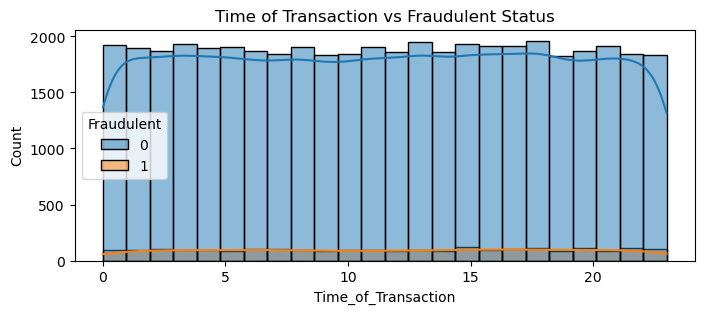

In [32]:
plt.figure(figsize=(8, 3))
sns.histplot(data=df, x='Time_of_Transaction', hue='Fraudulent', bins=24,color='Green', kde=True)
plt.title('Time of Transaction vs Fraudulent Status')
plt.show()

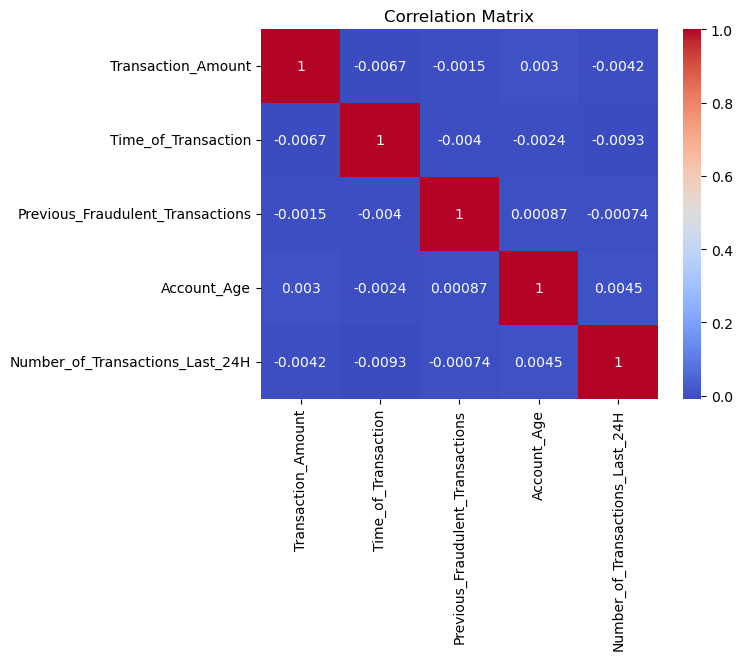

In [34]:
# Correlation matrix for numerical features
numerical_cols = ['Transaction_Amount', 'Time_of_Transaction', 'Previous_Fraudulent_Transactions', 
                  'Account_Age', 'Number_of_Transactions_Last_24H']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [37]:
# Filling missing numerical values with median
df['Transaction_Amount'].fillna(df['Transaction_Amount'].median(), inplace=True)

C:\Users\nayan\AppData\Local\Temp\ipykernel_19996\1983059975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction_Amount'].fillna(df['Transaction_Amount'].median(), inplace=True)


In [39]:
df['Time_of_Transaction'].fillna(df['Time_of_Transaction'].median(), inplace=True)

C:\Users\nayan\AppData\Local\Temp\ipykernel_19996\3941082205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_of_Transaction'].fillna(df['Time_of_Transaction'].median(), inplace=True)


In [41]:
df['Device_Used'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)
df['Payment_Method'].fillna('Unknown', inplace=True)

C:\Users\nayan\AppData\Local\Temp\ipykernel_19996\3511699299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Device_Used'].fillna('Unknown', inplace=True)
C:\Users\nayan\AppData\Local\Temp\ipykernel_19996\3511699299.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [43]:
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

### Encode Categorical Variables

In [46]:
# Applying one Hot encoding on Categorical Features One-hot encoding
categorical_cols = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [48]:
df_encoded.drop(['Transaction_ID', 'User_ID'], axis=1, inplace=True)

In [50]:
df_encoded.head()

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,...,Location_Miami,Location_New York,Location_San Francisco,Location_Seattle,Location_Unknown,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown
0,1292.76,16.0,0,119,13,0,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,1554.58,13.0,4,79,3,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2395.02,12.0,3,115,9,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,100.10,15.0,4,3,4,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1490.50,19.0,2,57,7,0,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


### 2.3 Normalize/Scale Numerical Variables

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
numerical_cols = ['Transaction_Amount', 'Time_of_Transaction', 'Previous_Fraudulent_Transactions', 
                  'Account_Age', 'Number_of_Transactions_Last_24H']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [57]:
df_encoded.head(20)

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,...,Location_Miami,Location_New York,Location_San Francisco,Location_Seattle,Location_Unknown,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown
0,-0.340960,0.664877,-1.410441,1.714659,1.369323,0,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,-0.287913,0.220229,1.415459,0.551605,-1.118384,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,-0.117633,0.072013,0.708984,1.598353,0.374241,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,-0.582603,0.516661,1.415459,-1.658197,-0.869613,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,-0.300896,1.109525,0.002509,-0.088074,-0.123301,0,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
5,-0.122289,0.516661,0.708984,1.045903,1.618094,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,-0.492501,-1.410147,0.708984,-1.570968,0.374241,1,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
7,-0.474076,0.220229,0.002509,-1.367433,0.623011,0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8,-0.133062,0.072013,1.415459,1.452972,1.120553,0,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
9,0.137887,-1.261931,1.415459,0.173613,-1.118384,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


### Model Implementation

In [78]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [64]:
X = df_encoded.drop('Fraudulent', axis=1)
y = df_encoded['Fraudulent']


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
X_train

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Device_Used_Mobile,...,Location_Miami,Location_New York,Location_San Francisco,Location_Seattle,Location_Unknown,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown
32612,-0.043022,1.405956,1.415459,-0.640525,-0.869613,False,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
9426,-0.402371,1.257740,0.002509,-0.262532,0.374241,False,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
28171,0.372331,0.368445,0.002509,1.598353,-0.620842,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
826,0.222952,-0.076203,-0.703966,-1.280204,0.374241,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
24189,-0.091586,0.961309,0.002509,0.696987,0.374241,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11824,-0.090745,0.368445,0.002509,-0.320685,-1.367154,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
14570,-0.294376,0.368445,-0.703966,0.086384,0.374241,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,False
46145,0.356819,-1.558363,0.708984,1.191285,-0.620842,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
9633,0.064176,1.702388,-1.410441,0.726063,0.871782,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True


In [70]:
X_test

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Device_Used_Mobile,...,Location_Miami,Location_New York,Location_San Francisco,Location_Seattle,Location_Unknown,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown
20927,-0.248789,-0.372635,0.708984,-0.902212,1.369323,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
39055,-0.555636,-0.224419,0.708984,-0.000845,-1.367154,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
26671,-0.278283,0.368445,0.002509,-0.931288,0.623011,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
21890,-0.551278,-0.520851,0.002509,-0.582372,-0.123301,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
26525,0.409915,-0.669067,-0.703966,-1.367433,0.871782,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15001,-0.558521,0.072013,-0.703966,-1.134822,-0.372072,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
12837,0.337055,-0.076203,0.708984,1.365743,-0.372072,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
25071,-0.351913,0.368445,-1.410441,-1.600044,0.125470,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
45893,0.067371,-1.113715,-0.703966,-0.873135,0.374241,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [72]:
# Calculate scale_pos_weight (ratio of negative to positive samples)
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

In [74]:
print(f'scale_pos_weight: {scale_pos_weight}')

scale_pos_weight: 19.315768139440618


In [80]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, scale_pos_weight]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
xgb_model = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict the probabilities of the classes
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the new AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'New AUC-ROC: {roc_auc:.4f}')

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


C:\Users\nayan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:12:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\nayan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:12:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.9}
New AUC-ROC: 0.5198


In [81]:
# Predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9531
           1       0.00      0.00      0.00       493

    accuracy                           0.95     10024
   macro avg       0.48      0.50      0.49     10024
weighted avg       0.90      0.95      0.93     10024



C:\Users\nayan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nayan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nayan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


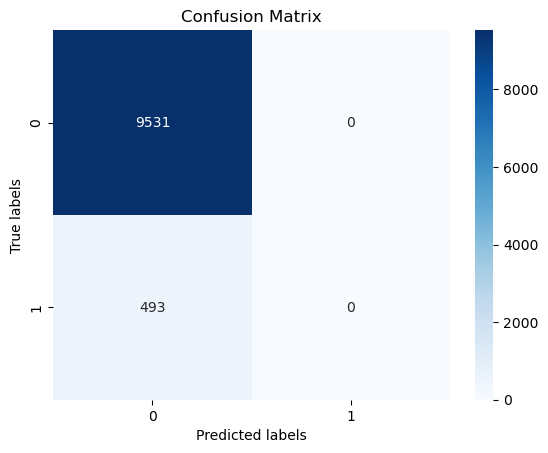

In [82]:
# Classification report
print(classification_report(y_test, y_pred))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [90]:
from sklearn.metrics import roc_auc_score

# Assuming y_test and y_pred_proba are defined
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {roc_auc:.4f}')

AUC-ROC: 0.5198


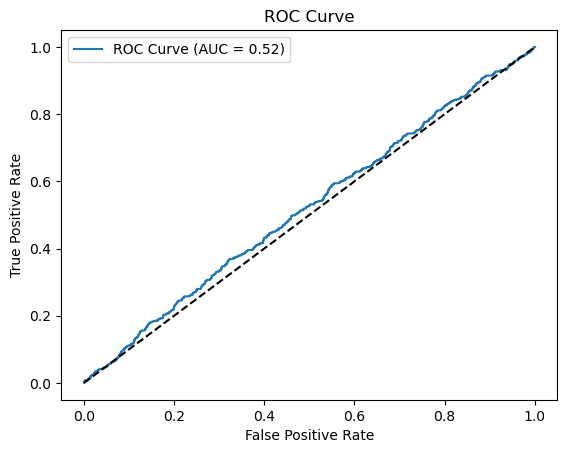

In [92]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [94]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance.head(10))

                             Feature  Importance
18            Location_San Francisco    0.052802
24                Payment_Method_UPI    0.051714
12        Device_Used_Unknown Device    0.047499
2   Previous_Fraudulent_Transactions    0.046727
8       Transaction_Type_POS Payment    0.046426
22     Payment_Method_Invalid Method    0.045119
5     Transaction_Type_Bank Transfer    0.045029
14                  Location_Houston    0.040546
21         Payment_Method_Debit Card    0.039994
17                 Location_New York    0.039763


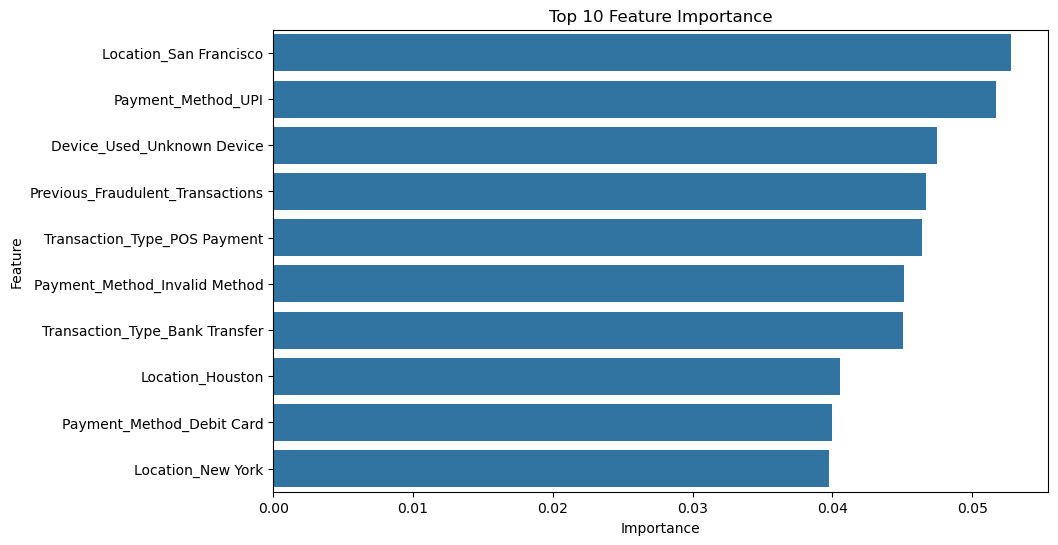

In [96]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.show()